Task 1 

In [17]:
import pandas as pd 
import numpy as np
import time
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("/Users/admin/Downloads/weight-height.csv")
df.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [19]:
x_data = df['Height'].values
y_data = df['Weight'].values
n = len(x_data)

A = np.column_stack((np.ones(n), x_data))  
b = y_data                                 

A

array([[ 1.        , 73.84701702],
       [ 1.        , 68.78190405],
       [ 1.        , 74.11010539],
       ...,
       [ 1.        , 63.86799221],
       [ 1.        , 69.03424313],
       [ 1.        , 61.94424588]])

In [20]:
def LSE_grad(A, x, b):
    m = A.shape[0]
    grad = (1/ m) * A.T @ (A @ x - b)
    return grad

In [21]:
def calculate_L(A): 
    m = A.shape[0]
    L = (1/m) * np.linalg.norm(A.T @ A, 2) 
    return L

In [22]:
def MSE (A, x, b):
    m = A.shape[0]
    e = A @ x-b
    return (1/(2*m)*np.linalg.norm(e)**2) 

In [23]:
def gradient_descent(x0, learning_rate, max_iter, A, b):
    history = []
    x = x0
    for i in range(max_iter):
        grad = LSE_grad(A, x, b)
        new_x = x - learning_rate * grad
        if np.isnan(new_x).any() or np.isinf(new_x).any():
            return x, i, history
        
        x = new_x
        history.append(MSE(A, x, b))
        
    return x, i, history

In [40]:
x0 = [-300, 6]
learning_rate = 1 / calculate_L(A)
max_iter = 10000

x_mse, steps, history = gradient_descent(x0, learning_rate, max_iter, A, b)


In [41]:
print("Optimal ω:", x_mse)
print("Gradient descent steps:", steps)

Optimal ω: [-300.36865081    6.9608958 ]
Gradient descent steps: 9999


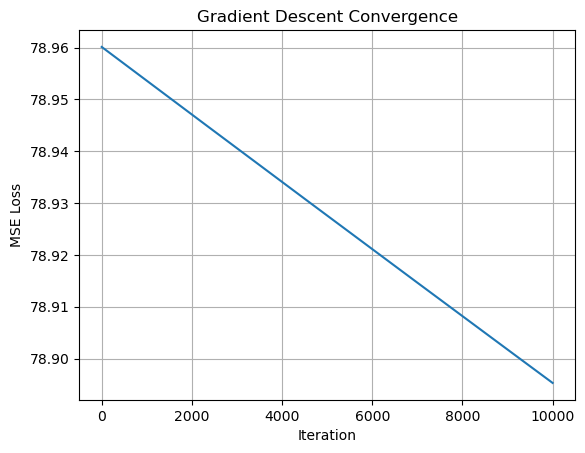

In [42]:
plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent Convergence")
plt.grid(True)
plt.show()

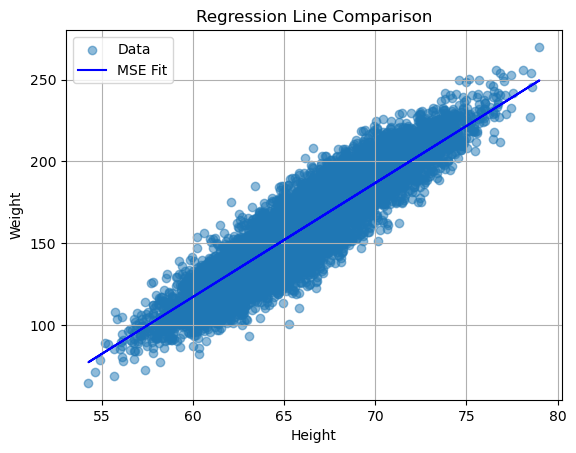

In [47]:

plt.scatter(x_data, y_data, label="Data", alpha=0.5)

y_pred_mse = A @ x_mse

plt.plot(x_data, y_pred_mse, label="MSE Fit", color='blue')

plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Regression Line Comparison")
plt.legend()
plt.grid(True)
plt.show()

Task 2 


In [48]:
def SGD(x0, learning_rate, max_iter, A, b):
    n = A.shape[0]
    x = x0.copy()
    history = []

    for i in range(max_iter):
        idx = np.random.randint(0,n)
        A_i = A[idx].reshape(1,-1)
        b_i = b[idx]

        grad = A_i.T @ (A_i @ x - b_i)

        x = x - learning_rate * grad.flatten()
        if i % 10 == 0:
            history.append(MSE(A, x, b))

    return x, history  

In [58]:
x0 = [-300, 6]


x_sgd, history_sgd = SGD(x0, learning_rate, max_iter, A, b)


In [59]:
print("SGD weights:", x_sgd)

SGD weights: [-300.39365465    6.98462593]


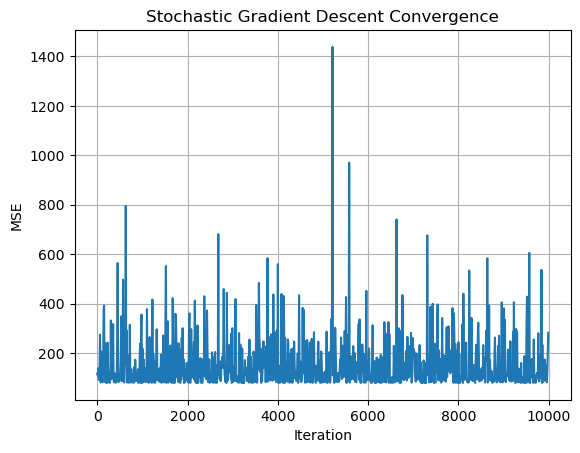

In [60]:
plt.plot(range(0, max_iter, 10), history_sgd)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Stochastic Gradient Descent Convergence")
plt.grid(True)
plt.show()

Task 3 

In [31]:
def MAE(A, x, b):
    e = A @ x - b 
    return np.mean(np.abs(e))

In [32]:
def MAE_subgrad(A, x, b):
    e = A @ x - b 
    sign = np.sign(e)
    grad = (1/ A.shape[0]) * A.T @ sign 
    return grad 

In [51]:
def subgradient_descent(x0, learning_rate, max_iter, A, b):
    x = x0.copy()
    history = []

    for i in range(max_iter):
        grad = MAE_subgrad(A, x, b)
        new_x = x - learning_rate * grad 

        x = new_x
        history.append(MAE(A, x, b))
    return x, history

In [ ]:
x0 = [-300, 6]
max_iter = 10000
x_mae, history_mae = subgradient_descent(x0, learning_rate, max_iter, A, b)
print("MAE solution:", x_mae)

MAE solution: [-300.01521311    6.95488593]


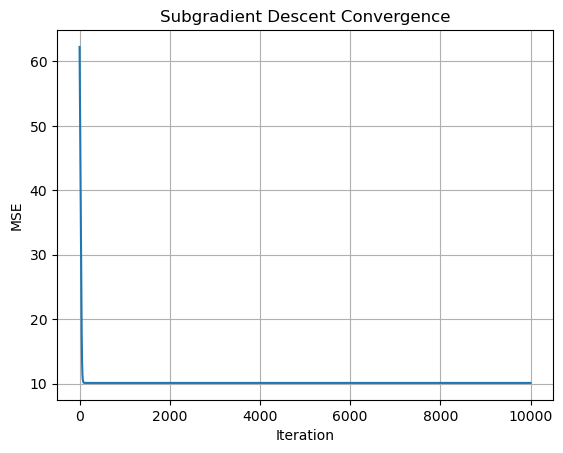

In [56]:
plt.plot(history_mae)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Subgradient Descent Convergence")
plt.grid(True)
plt.show()

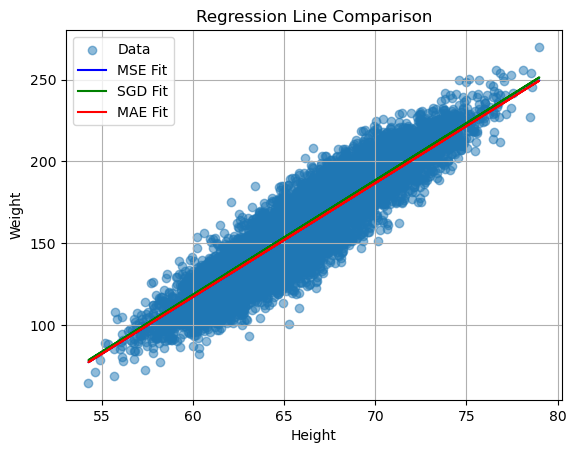

In [61]:

plt.scatter(x_data, y_data, label="Data", alpha=0.5)

y_pred_mse = A @ x_mse
y_pred_sgd = A @ x_sgd
y_pred_mae = A @ x_mae

plt.plot(x_data, y_pred_mse, label="MSE Fit", color='blue')
plt.plot(x_data, y_pred_sgd, label="SGD Fit", color='green')
plt.plot(x_data, y_pred_mae, label="MAE Fit", color='red')

plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Regression Line Comparison")
plt.legend()
plt.grid(True)
plt.show()

(a) Is MAE fit better?
→ Yes, especially if outliers exist. MAE is more robust.

(b) Non-differentiable points?
→ Yes, when residuals e_i = 0. But we used np.sign, which handles it by returning 0 (a valid subgradient).

Task 4 

In [37]:
def stochastic_subgradient_descent(x0, learning_rate, max_iter, A, b):
    n = A.shape[0]
    x = x0.copy()
    history = []

    for i in range(max_iter):
        idx = np.random.randint(0, n)
        A_i = A[idx].reshape(1, -1)
        b_i = b[idx]

        e_i = A_i @ x - b_i
        sign = np.sign(e_i)  

        grad = A_i.T * sign

        x = x - learning_rate * grad.flatten()

        if i % 10 == 0:
            history.append(MAE(A, x, b))
    return x, history

In [62]:
x_ssgd, history_ssgd = stochastic_subgradient_descent(x0, learning_rate, max_iter, A, b)
print("x_ssgd =", x_ssgd)

x_ssgd = [-300.01402572    6.99363442]


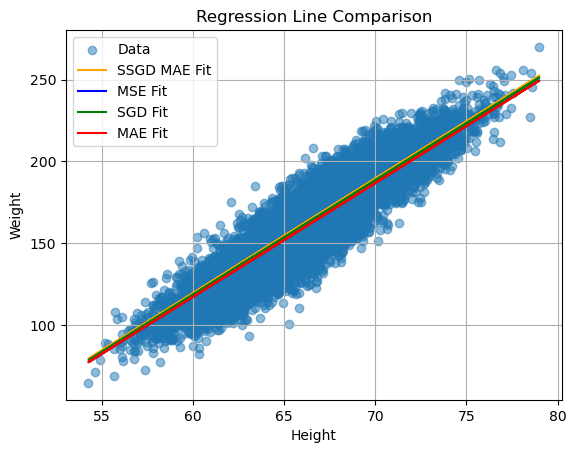

In [63]:
plt.scatter(x_data, y_data, label="Data", alpha=0.5)

y_pred_mse = A @ x_mse
y_pred_sgd = A @ x_sgd
y_pred_mae = A @ x_mae
y_pred_ssgd = A @ x_ssgd

plt.plot(x_data, y_pred_ssgd, label="SSGD MAE Fit", color='orange')
plt.plot(x_data, y_pred_mse, label="MSE Fit", color='blue')
plt.plot(x_data, y_pred_sgd, label="SGD Fit", color='green')
plt.plot(x_data, y_pred_mae, label="MAE Fit", color='red')

plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Regression Line Comparison")
plt.legend()
plt.grid(True)
plt.show()

The MAE-based regression line fits the bulk of the data more conservatively than the MSE-based lines. Unlike MSE, which is highly sensitive to outliers, MAE minimizes the average absolute error, resulting in a line that is more stable in the presence of outliers. The SSGD variant for MAE shows a similar trend but introduces small fluctuations due to randomness, leading to slightly different convergence behavior.